<a href="https://colab.research.google.com/github/henryezikeai/Prediction-of-product-sales/blob/main/sales_prediction_model_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [155]:
filepath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

In [156]:
df = pd.read_csv(filepath)

In [157]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [158]:
df.isna().sum() #Checking for missing items

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [159]:
replacements = {
    'LF':'Low Fat',
    'low fat':'Low Fat',
    'reg':'Regular'
}

#Created a dictionary for the replacement of inconsistent values

In [160]:
val = df['Item_Fat_Content'].value_counts()
val

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [161]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(replacements) #Replaced inconsistent values with values that are consistent


In [162]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [163]:
df = df.drop(columns='Item_Identifier')

[Text(0.5, 1.0, 'Item Sales')]

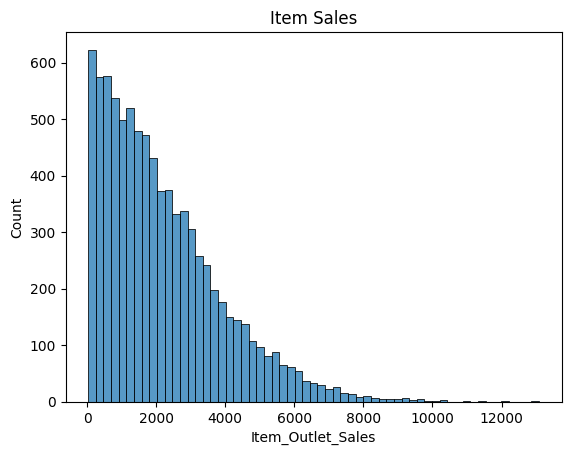

In [164]:
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.set(title="Item Sales")

[Text(0.5, 1.0, 'Item Sales')]

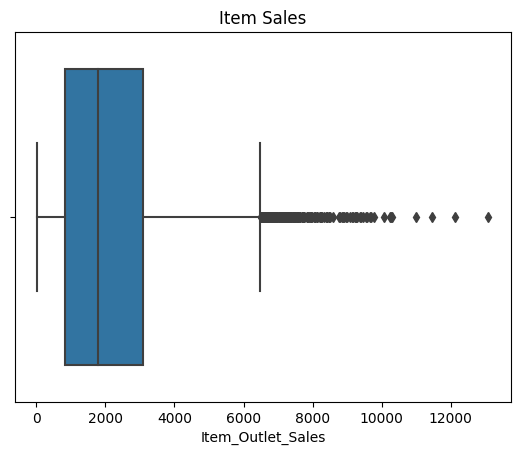

In [165]:
ax = sns.boxplot(data=df, x="Item_Outlet_Sales")
ax.set(title="Item Sales")

[Text(0.5, 1.0, 'Fat Content')]

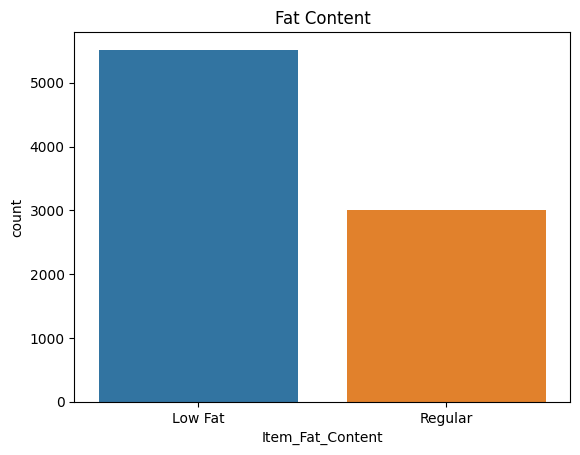

In [166]:
ax = sns.countplot(data=df, x="Item_Fat_Content")
ax.set(title="Fat Content")

[Text(0.5, 1.0, 'Item Types')]

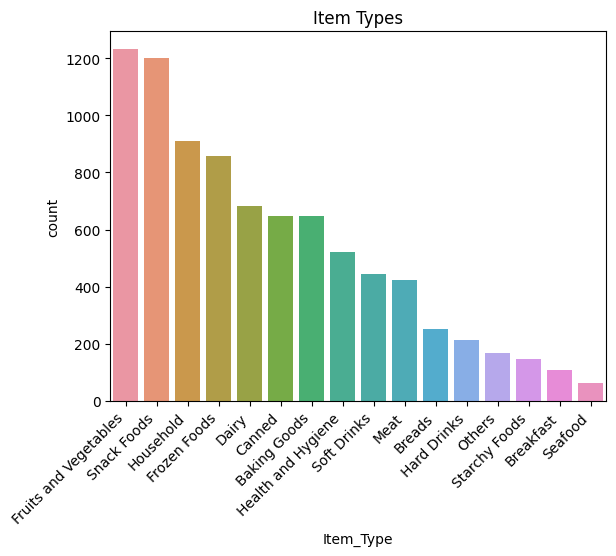

In [167]:
val_counts_order = df['Item_Type'].value_counts()
ax = sns.countplot(data=df, x="Item_Type", order = df['Item_Type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set(title="Item Types")

[Text(0.5, 1.0, 'Outlet Size')]

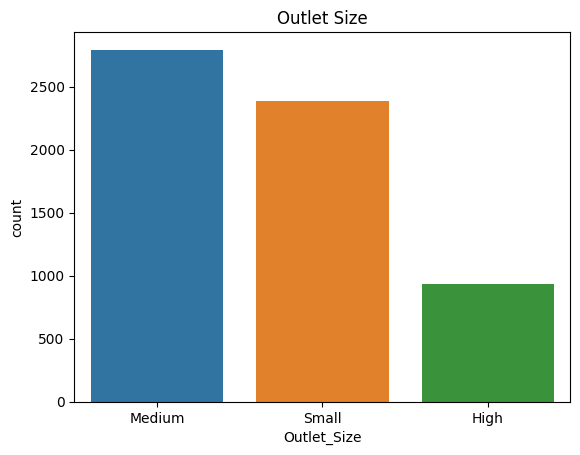

In [168]:
ax = sns.countplot(data=df, x="Outlet_Size", order= df['Outlet_Size'].value_counts().index)
ax.set(title="Outlet Size")

[Text(0.5, 1.0, 'Outlet Type')]

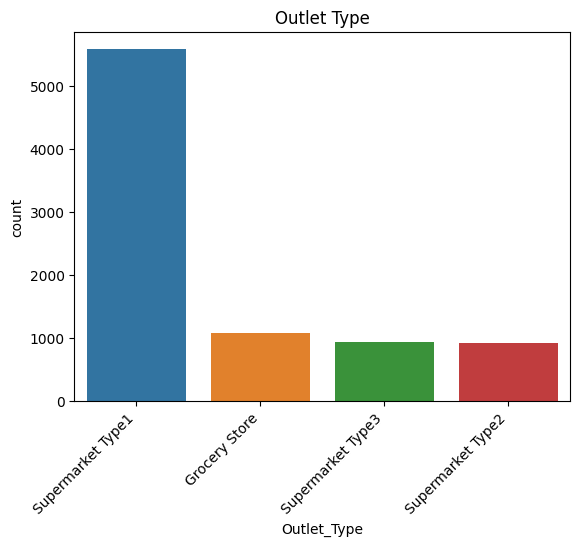

In [169]:
ax = sns.countplot(data=df, x="Outlet_Type", order = df['Outlet_Type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set(title="Outlet Type")

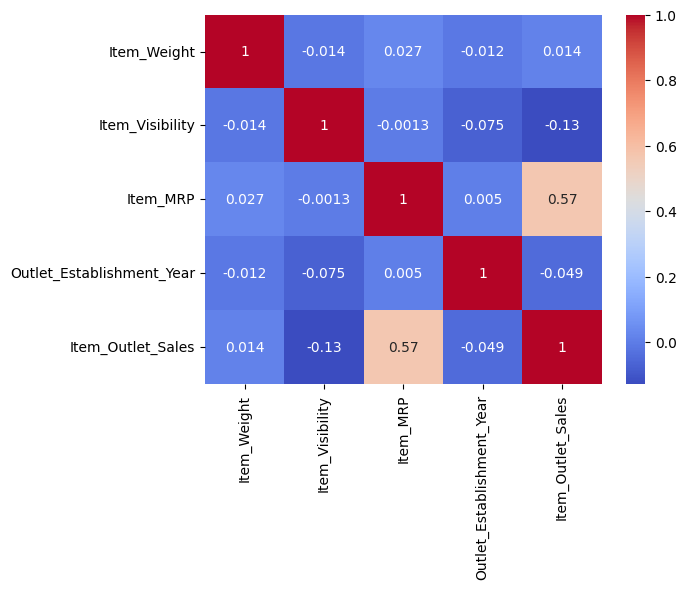

In [170]:
heatmap = df.corr(numeric_only=True)
ax = sns.heatmap(heatmap, cmap='coolwarm', annot = True)

In [171]:
y = df['Item_Outlet_Sales'] #Assigned my y value


In [172]:
X = df.drop(columns='Item_Outlet_Sales') #Created the features

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #Did a split between training and test data.

In [174]:
num_cols = X_train.select_dtypes("number").columns


In [175]:
impute_median = SimpleImputer(strategy='median') #Instantiated SimpleImputer

In [176]:
scaler = StandardScaler() #Instantiated StandardScaler

In [177]:
num_pipe  = make_pipeline(impute_median, scaler) #Created a pipeline for numeric values

In [178]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [179]:
cat_cols = X_train.select_dtypes("object").columns

In [180]:
impute_constant = SimpleImputer(strategy='constant', fill_value="Missing")

In [181]:
ohe_encoder = OneHotEncoder(drop= 'first', sparse_output=False)

In [182]:
cat_pipe = make_pipeline(impute_constant, ohe_encoder)

In [183]:
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='Missing', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [184]:
num_tuple = ('numeric', num_pipe, num_cols)

In [185]:
cat_tuple = ('categorical', cat_pipe, cat_cols)

In [186]:
col_transformer = ColumnTransformer([num_tuple, cat_tuple], verbose_feature_names_out = False)

In [187]:
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [188]:
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [189]:
X_train_processed = col_transformer.transform(X_train) #Transformed Training data

In [190]:
X_test_processed = col_transformer.transform(X_test) #Transformed Testing data

In [191]:
X_train_processed

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.83,-0.71,1.83,1.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
7510,0.57,-1.29,0.60,1.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
5828,-0.12,1.81,0.24,0.14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
5327,-1.16,-1.00,-0.95,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
4810,1.54,-0.97,-0.34,0.49,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.82,4.31,-0.04,0.02,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
5191,0.65,1.01,-1.06,1.09,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
5390,1.12,-0.92,1.52,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
860,1.78,-0.23,-0.38,1.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00


In [192]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [193]:
linreg = LinearRegression()
linreg.fit(X_train_processed, y_train)
evaluate_regression(linreg, X_train_processed, y_train, X_test_processed, y_test )

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.157
- MSE = 1,297,553.546
- RMSE = 1,139.102
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.108
- MSE = 1,194,256.809
- RMSE = 1,092.821
- R^2 = 0.567


**I'd say that the model is neither overfit or underfit. It needs more data. The reason I conclude that it is neither overfit or underfit is because 0.567 and 0.562 are not poor. I'd call it average perfomance.**

In [194]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)
evaluate_regression(rf, X_train_processed, y_train, X_test_processed, y_test )

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.604
- MSE = 183,379.910
- RMSE = 428.229
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 773.969
- MSE = 1,231,341.595
- RMSE = 1,109.658
- R^2 = 0.554


**The model is overfit. It's performing way better on training data than on test data. Linear Regression model also performed better on Test data.**

In [195]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [196]:
param_grid = {'max_depth': [None],
              'n_estimators':[500],
              'min_samples_leaf':[9],
              'min_samples_split':[2,10]
              }

In [197]:
gridsearch = GridSearchCV(rf, param_grid, n_jobs=-1, cv = 3, verbose=1)
gridsearch.fit(X_train_processed, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [9],
                         'min_samples_split': [2, 10], 'n_estimators': [500]},
             verbose=1)

In [198]:
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 635.482
- MSE = 835,552.615
- RMSE = 914.086
- R^2 = 0.718

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 737.837
- MSE = 1,125,959.689
- RMSE = 1,061.112
- R^2 = 0.592


##4. Evaluation

**- Overall, I'll recommend the Random Forst Model. It did better than Linear Regression on test data on every metric.**

Question 1: Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.

- The R2 Squared metric of 0.592 means that our model is capable of predicting the correct value 59.2% of the time. The performance of the model might be average but it is better than the Linear Regression model. We always want R2 to be as close to 1/100% as possible on both the training data and test data but especially the test data.

Question 2: Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.

- The MAE is another metric that we can compare for both models. The Linear Regression model scored a MAE of 804.10 on test data and Random Forest model scored 736.89. If we are to make a decision on what model to deploy based on these metrics, I would encourage the business unit to deploy the Random Forest Model. Because it has a lower MAE. Generally, we want our models to make less errors. When our models make less errors, it gets maore predictions correctly which translates into more profits for the business.

Question 3: Include why you selected this metric to explain to your stakeholder.

- I selected the MAE to explain to the stakeholders because it is simpler to understand than RMSE and MSE.

Question 4: Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?

- By comparing the training data metrics and the test data metrics of the Random Forest Model, I would say that the model is neither overfit or underfit. It's not underfit because it has performed average on both training data and test data.
It's also not overfit because the training data metrics is doing doing way better than the test data metrics. The differences are minor.  



#Extracting and visualizing Coefficients.

In [199]:
linreg.coef_

array([-7.66668860e+00, -2.17394411e+01,  9.84414094e+02,  1.61978989e+15,
        6.22896890e+01, -2.80135493e+01,  4.55295431e+01,  2.72606882e+01,
       -1.07181054e+02, -1.63050196e+00,  4.53050817e+01,  1.35778694e+01,
        2.66827152e+01,  4.84122928e+00, -1.16715599e+01, -2.60947359e+01,
        3.27744077e+02, -2.19124786e+01, -3.89412810e+01,  4.23909128e+01,
        2.21546271e+15, -9.19972338e+13, -9.22105718e+13,  1.04753559e+14,
        5.43504565e+14, -1.60001135e+15,  8.73123547e+14, -4.14360072e+14,
        3.66659127e+14, -7.84960170e+14, -1.70497925e+15,  3.82107341e+14,
       -1.65517810e+14, -3.17473881e+14, -1.79717624e+15, -2.95107422e+15,
        1.04579039e+15])

In [200]:
feature_names = col_transformer.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Regular',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household',
       'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Missing', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_

In [203]:
coeffs = pd.Series(linreg.coef_, index=feature_names)
coeffs['intercept'] = linreg.intercept_
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

In [202]:
coeffs

Item_Weight                                           -7.67
Item_Visibility                                      -21.74
Item_MRP                                             984.41
Outlet_Establishment_Year          1,619,789,892,612,152.75
Item_Fat_Content_Regular                              62.29
Item_Type_Breads                                     -28.01
Item_Type_Breakfast                                   45.53
Item_Type_Canned                                      27.26
Item_Type_Dairy                                     -107.18
Item_Type_Frozen Foods                                -1.63
Item_Type_Fruits and Vegetables                       45.31
Item_Type_Hard Drinks                                 13.58
Item_Type_Health and Hygiene                          26.68
Item_Type_Household                                    4.84
Item_Type_Meat                                       -11.67
Item_Type_Others                                     -26.09
Item_Type_Seafood                       

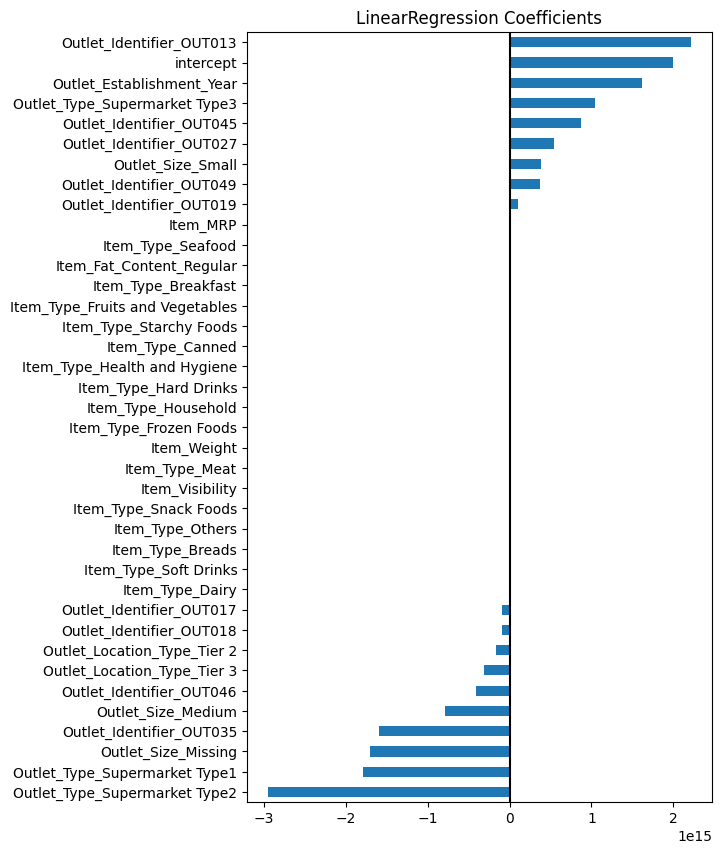

In [204]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');


In [205]:
rf.feature_importances_

array([0.05666421, 0.10041826, 0.44354177, 0.0384089 , 0.00908363,
       0.00259288, 0.00263817, 0.00430635, 0.00648129, 0.00618626,
       0.00807421, 0.00306984, 0.00423508, 0.00686615, 0.00369471,
       0.00169132, 0.00188368, 0.00847912, 0.00552133, 0.00361926,
       0.00194953, 0.00245028, 0.0113395 , 0.00168387, 0.05401015,
       0.00399601, 0.00433139, 0.00446837, 0.00278507, 0.02149336,
       0.00366799, 0.00423992, 0.00247652, 0.00231025, 0.09295423,
       0.01081492, 0.05757221])

In [208]:
importances = pd.Series(rf.feature_importances_, index=feature_names)
importances.sort_values()

Outlet_Identifier_OUT019          0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Outlet_Identifier_OUT013          0.00
Outlet_Location_Type_Tier 3       0.00
Outlet_Identifier_OUT017          0.00
Outlet_Location_Type_Tier 2       0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Outlet_Identifier_OUT049          0.00
Item_Type_Hard Drinks             0.00
Item_Type_Starchy Foods           0.00
Outlet_Size_Missing               0.00
Item_Type_Meat                    0.00
Outlet_Identifier_OUT035          0.00
Item_Type_Health and Hygiene      0.00
Outlet_Size_Small                 0.00
Item_Type_Canned                  0.00
Outlet_Identifier_OUT045          0.00
Outlet_Identifier_OUT046          0.00
Item_Type_Soft Drinks             0.01
Item_Type_Frozen Foods            0.01
Item_Type_Dairy                   0.01
Item_Type_Household               0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Snack Foods    

<Axes: >

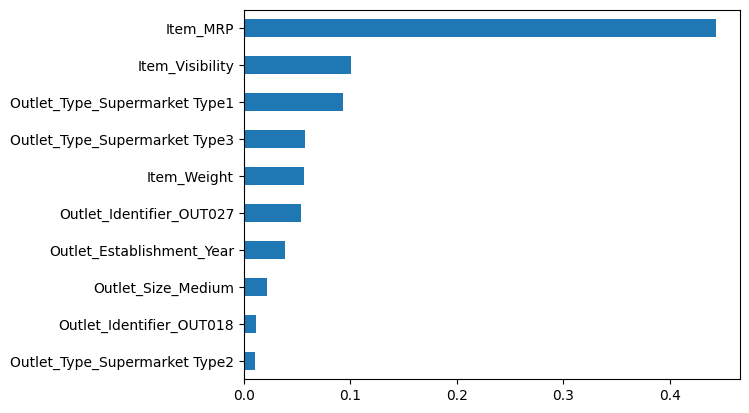

In [210]:
importances.sort_values().tail(10).plot(kind='barh')